<a href="https://colab.research.google.com/github/KevinH2003/PyTorch-Fundamentals/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#PyTorch Workflow
import torch
from torch import nn
import matplotlib.pyplot as plt

weight = 0.5
bias = 10

start = -10
end = 10
step = 0.2
x = torch.arange(start, end, step).unsqueeze(1)
y = weight * x + bias
#hiii

In [3]:
training = int(0.7 * len(x))
xtraining, ytraining = x[:training], y[:training]
xtesting, ytesting = x[training:], y[training:]

def plot_predictions(train_data=xtraining, train_labels=ytraining, test_data=xtesting, test_labels=ytesting, predictions=None):
    """Plots training, test, and predictions"""
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c="r", s=4, label="Testing Data")
  #plot the training data in blue, testing data in red

    if predictions is not None:
    #plot the predictions if they exist
        plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

    plt.legend(prop={"size": 14})


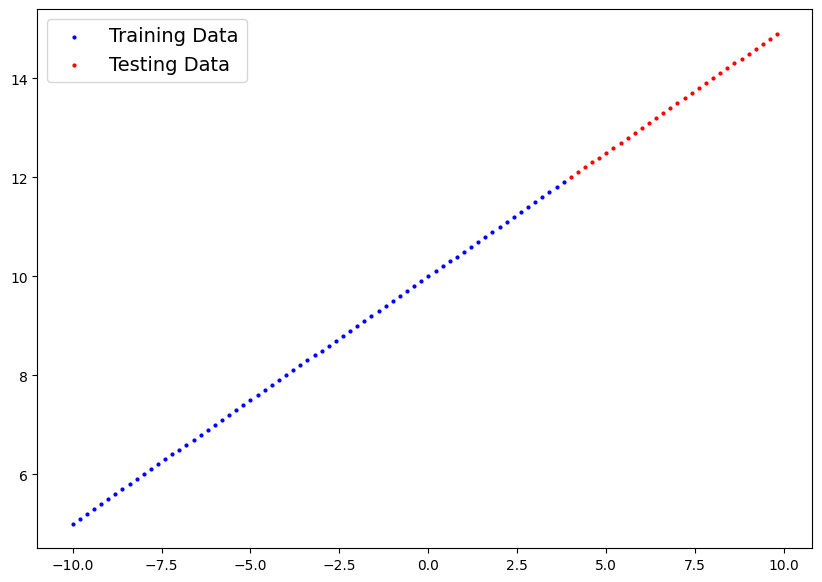

In [4]:
plot_predictions();

In [5]:
class LinRegModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) #start with random weight, try to get it to the ideal weight
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) #start with random bias, try to get it to the ideal bias

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

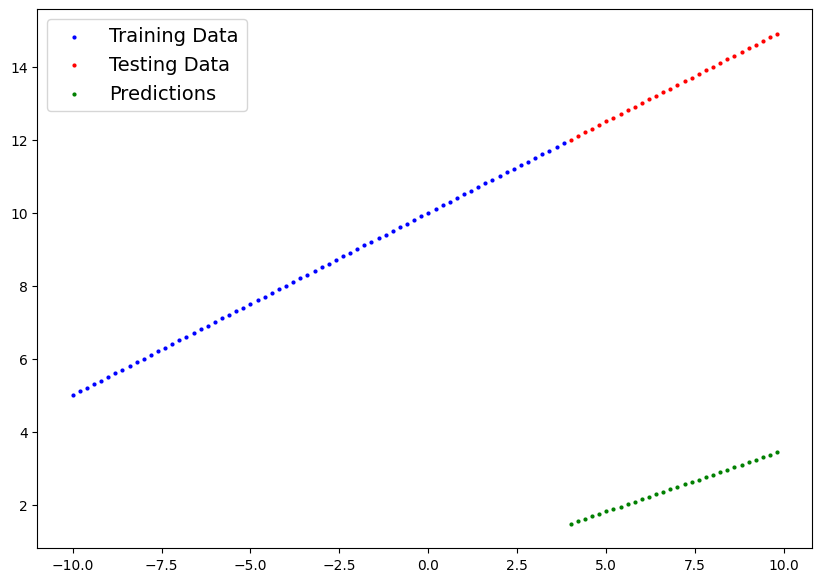

In [6]:
torch.manual_seed(42)

model0 = LinRegModel()

with torch.inference_mode():
    y_preds = model0(xtesting)

    plot_predictions(predictions=y_preds)

model0.state_dict()